## Linearly separable data:

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.model_selection import train_test_split

from scipy.stats import multivariate_normal

In [182]:
data = np.loadtxt('36_ls.txt')

Dividing data into 70% for training, 20% for validation and 10% for testing

In [183]:
cA = data[:500]
cB = data[500:1000]
cC = data[1000:]

cA_train,cA_test,cB_train,cB_test,cC_train,cC_test = train_test_split(cA,cB,cC,test_size=0.1, random_state=42)
cA_train,cA_valid,cB_train,cB_valid,cC_train,cC_valid = train_test_split(cA_train,cB_train,cC_train,test_size=0.22, random_state=42)

In [184]:
cA.shape

(500, 2)

In [185]:
mu_A = np.vstack((np.mean(cA_train[:,0]),np.mean(cA_train[:,1])))
mu_B = np.vstack((np.mean(cB_train[:,0]),np.mean(cB_train[:,1])))
mu_C = np.vstack((np.mean(cC_train[:,0]),np.mean(cC_train[:,1])))

cov_A = np.cov(cA_train[:,0],cA_train[:,1])
cov_B = np.cov(cB_train[:,0],cB_train[:,1])
cov_C = np.cov(cC_train[:,0],cC_train[:,1])

In [186]:
def l(x1,x2,mu,cov):
    x = np.vstack((x1,x2))
    return (1/(2*np.pi*np.linalg.det(cov)**0.5)* \
    (np.e**(-0.5*np.matmul(np.matmul(np.transpose((x-mu)),np.linalg.inv(cov)),(x-mu)))) ).reshape(1) #

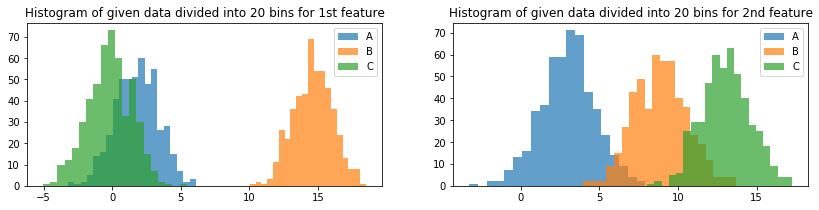

In [187]:
plt.figure(figsize=(14, 3))
plt.subplot(1,2,1)
plt.hist(cA[:,0],20, alpha=0.7, label='A')
plt.hist(cB[:,0],20, alpha=0.7, label='B')
plt.hist(cC[:,0],20, alpha=0.7, label='C')
plt.title('Histogram of given data divided into 20 bins for 1st feature')
plt.legend()

plt.subplot(1,2,2)
plt.hist(cA[:,1],20, alpha=0.7, label='A')
plt.hist(cB[:,1],20, alpha=0.7, label='B')
plt.hist(cC[:,1],20, alpha=0.7, label='C')
plt.title('Histogram of given data divided into 20 bins for 2nd feature')
plt.legend()
plt.show()

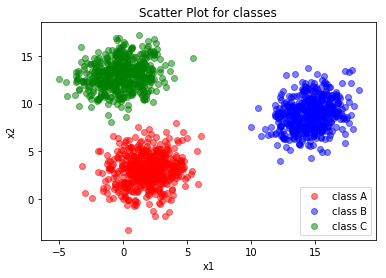

In [188]:
plt.scatter(cA[:,0], cA[:,1], c='red', alpha=0.5, label='class A')
plt.scatter(cB[:,0], cB[:,1], c='blue', alpha=0.5, label='class B')
plt.scatter(cC[:,0], cC[:,1], c='green', alpha=0.5, label='class C')
plt.title("Scatter Plot for classes")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

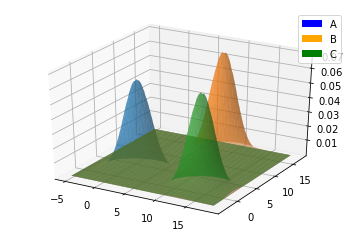

In [189]:
X_axis = np.linspace(min(data[:,0]),max(data[:,0]),100)
Y_axis = np.linspace(min(data[:,1]),max(data[:,1]),100)

z1 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(l(x,y,mu_A,cov_A))
    z1.append(temp)
    
z2 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(l(x,y,mu_B,cov_B))
    z2.append(temp)

z3 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(l(x,y,mu_C,cov_C))
    z3.append(temp)

z1 = np.array(z1).reshape(100,100)
z2 = np.array(z2).reshape(100,100)
z3 = np.array(z3).reshape(100,100)

x,y = np.meshgrid(X_axis, Y_axis)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z1, linewidth=0, alpha=0.5)
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
ax.plot_surface(x, y, z2, linewidth=0, alpha=0.5)
orange_proxy = plt.Rectangle((0, 0), 1, 1, fc="orange")
ax.plot_surface(x, y, z3, linewidth=0, alpha=0.5)
green_proxy = plt.Rectangle((0, 0), 1, 1, fc="g")
ax.legend([blue_proxy,orange_proxy,green_proxy],['A','B','C'])
plt.show()

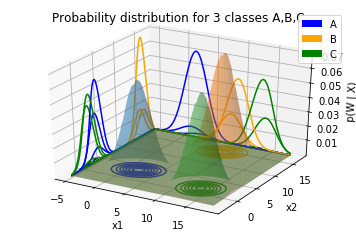

In [204]:
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
x1off = min(X_axis)
x2off = max(Y_axis)
zoff = 0
ax.plot_surface(x, y, z1, rstride=3, cstride=3, alpha=0.3, label = 'A')
cset = ax.contour(x, y, z1, zdir='z', offset=zoff, colors="b")
cset = ax.contour(x, y, z1, zdir='x', offset=x1off, colors="b")
cset = ax.contour(x, y, z1, zdir='y', offset=x2off, colors="b")

ax.plot_surface(x, y, z2, rstride=3, cstride=3, alpha=0.3, label = 'B')
cset = ax.contour(x, y, z2, zdir='z', offset=zoff, colors="orange")
cset = ax.contour(x, y, z2, zdir='x', offset=x1off, colors="orange")
cset = ax.contour(x, y, z2, zdir='y', offset=x2off, colors="orange")

ax.plot_surface(x, y, z3, rstride=3, cstride=3, alpha=0.3, label = 'C')
cset = ax.contour(x, y, z3, zdir='z', offset=zoff, colors="g")
cset = ax.contour(x, y, z3, zdir='x', offset=x1off, colors="g")
cset = ax.contour(x, y, z3, zdir='y', offset=x2off, colors="g")

plt.title('Probability distribution for 3 classes A,B,C')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('p(W | X)')
#legends
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
orange_proxy = plt.Rectangle((0, 0), 1, 1, fc="orange")
green_proxy = plt.Rectangle((0, 0), 1, 1, fc="g")
ax.legend([blue_proxy,orange_proxy,green_proxy],['A','B','C'])

plt.show()

In [137]:
print(mu_A)
print(cov_A)
print(mu_B)
print(cov_B)
print(mu_C)
print(cov_C)

[[  431.3045584 ]
 [ 1230.63239316]]
[[  34099.66148259   46561.45445706]
 [  46561.45445706  178855.3288034 ]]
[[  413.41535613]
 [ 1895.38888889]]
[[ 13077.06021809  -8587.22394603]
 [ -8587.22394603  54106.7599619 ]]
[[  579.03960114]
 [ 1434.74578348]]
[[ 24153.06875241   6345.43872488]
 [  6345.43872488  59428.63175188]]


### Case 1 : 

In [205]:
def decision_line_1(sig, mu1, mu2, p1, p2):
    sigma = np.identity(2)*sig
    w = mu1-mu2
    
    x0 = 0.5*(mu1+mu2) - sig/np.matmul(np.transpose(w),w)*np.log(p1/p2)*w
    m = - w[0]/w[1]
    c = (w[0]*x0[0]+w[1]*x0[1])/w[1]
    return np.array([m, c])
    

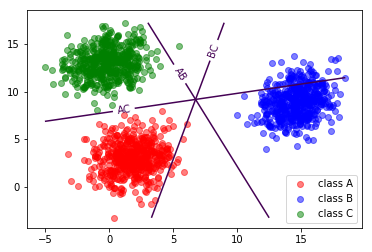

In [270]:
sig = 2.96

plt.scatter(cA[:,0], cA[:,1], c='red', alpha=0.5, label='class A')
plt.scatter(cB[:,0], cB[:,1], c='blue', alpha=0.5, label='class B')
plt.scatter(cC[:,0], cC[:,1], c='green', alpha=0.5, label='class C')

#g12
[m12, c12] = decision_line_1(sig, mu_A, mu_B, 1/2,1/2)
CS = plt.contour(x, y, m12*x + c12 - y, levels=[0])
fmt = {}
strs = ['AB']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
# Label every other level using strings
plt.clabel(CS, CS.levels[::2], inline=True, fmt=fmt, fontsize=10)

#g13
[m13, c13] = decision_line_1(sig, mu_A, mu_C, 0.5,0.5)
CS = plt.contour(x, y, m13*x + c13 - y, levels=[0])
fmt = {}
strs = ['AC']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
# Label every other level using strings
plt.clabel(CS, CS.levels[::2], inline=True, fmt=fmt, fontsize=10)

#g23
[m23, c23] = decision_line_1(sig, mu_C, mu_B, 0.5,0.5)
CS = plt.contour(x, y, m23*x + c23 - y, levels=[0])
fmt = {}
strs = ['BC']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
# Label every other level using strings
plt.clabel(CS, CS.levels[::2], inline=True, fmt=fmt, fontsize=10)

plt.legend()
plt.show()

In [91]:
from matplotlib import pyplot as plt
def DETCurve(fps,fns):
    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """
    axis_min = min(fps[0],fns[-1])
    fig,ax = plt.subplots()
    plot(fps,fns)
    yscale('log')
    xscale('log')
    ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    axis([0.001,50,0.001,50])

In [210]:
def decide(x):
    x1,x2 = x
    g12 = m12*x1+c12-x2
    g13 = m13*x1+c13-x2
    g23 = m23*x1+c23-x2
    
    if g12>0 and g13>0:
        return 1
    elif g12<0 and g23>0:
        return 2
    elif g23<0 and g13<0:
        return 3
    else:
        return -1
    

In [211]:
pred_A = np.array([decide(i) for i in cA])
pred_B = np.array([decide(i) for i in cB])
pred_C = np.array([decide(i) for i in cC])

In [212]:
conf_mat = np.array([[(pred_A == 1).sum(), (pred_A == 2).sum(),(pred_A == 3).sum()],
                    [(pred_B == 1).sum(), (pred_B == 2).sum(),(pred_B == 3).sum()],
                    [(pred_C == 1).sum(), (pred_C == 2).sum(),(pred_C == 3).sum()]])
no_class = (pred_A == -1).sum()+(pred_B == -1).sum()+(pred_B == -1).sum()

In [213]:
print(conf_mat, no_class)

[[500   0   0]
 [  0 500   0]
 [  0   0 500]] 0


### Case3 : Arbitary Sigma

In [237]:
def decision_function(sigma, mu, p):
    iSigma = np.linalg.inv(sigma)
    A = 0.5*iSigma
    B = np.matmul(iSigma, mu)
    C = -0.5*np.matmul(np.matmul(np.transpose(mu), iSigma), mu) -0.5*np.log(np.linalg.det(iSigma)) + np.log(p)
    
    #C + B0 x1 + A00 x1^2 + B1 x2 + A01 x1 x2 + A10 x1 x2 + A11 x2^2
    return np.array([C[0][0], B[0][0], A[0][0], B[1], A[0][1], A[1][0], A[1][1]])
    
def decision_line_3(sigma1, sigma2, mu1, mu2, p1, p2):
    
    return decision_function(sigma1, mu1, p1)-decision_function(sigma2, mu2, p2)

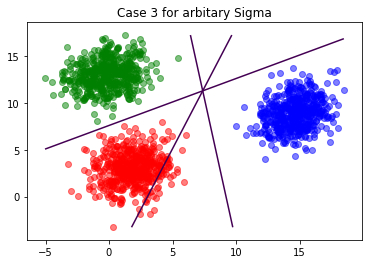

In [260]:
cof1 = decision_line_3(cov_B, cov_B, mu_A, mu_B, 0.5, 0.5)
cof2 = decision_line_3(cov_B, cov_B, mu_A, mu_C, 0.5, 0.5)
cof3 = decision_line_3(cov_B, cov_B, mu_B, mu_C, 0.5, 0.5)
z1 = cof1[0] + cof1[1]*x + cof1[2]*x**2 + cof1[3]*y + (cof1[4]+cof1[5])*x*y + cof1[6]*y**2   #
z2 = cof2[0] + cof2[1]*x + cof2[2]*x**2 + cof2[3]*y + (cof2[4]+cof2[5])*x*y + cof2[6]*y**2   #
z3 = cof3[0] + cof3[1]*x + cof3[2]*x**2 + cof3[3]*y + (cof3[4]+cof3[5])*x*y + cof3[6]*y**2   #
plt.figure()
plt.contour(x, y, z1, levels=[0])
plt.contour(x, y, z2, levels=[0])
plt.contour(x, y, z3, levels=[0])
plt.title('Case 3 for arbitary Sigma')

plt.scatter(cA[:,0], cA[:,1], c='red', alpha=0.5, label='class A')
plt.scatter(cB[:,0], cB[:,1], c='blue', alpha=0.5, label='class B')
plt.scatter(cC[:,0], cC[:,1], c='green', alpha=0.5, label='class C')

plt.show()

In [243]:
z.shape

(100, 100)